#deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Memanggil dataset

In [2]:
df = pd.read_csv('Mercedes Benz.csv')

Deskripsi dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   engineSize    3899 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB


In [5]:
df.describe()

,year,price,mileage,engineSize
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,23674.286997,22395.709156,2.037394
std,2.213416,8960.218218,22630.438426,0.487769
min,1991.000000,1290.000000,1.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000
50%,2018.000000,22980.000000,14640.000000,2.000000
75%,2019.000000,28900.000000,32458.500000,2.100000
max,2020.000000,88995.000000,173000.000000,6.200000


VISUALISASI DATA

<AxesSubplot:>

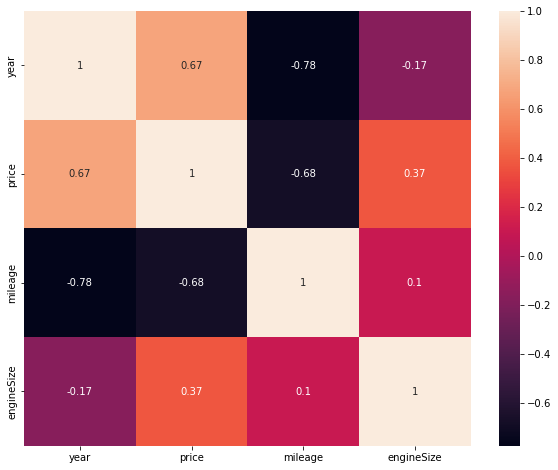

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

JUMLAH MOBIL BERDASARKAN MODEL

In [12]:
models = df.groupby('model').count()[['price']].sort_values(by='price', ascending=True).reset_index()
models = models.rename(columns={'price': 'NumberofCars'})

(array([0]), [Text(0, 0, ' C Class')])

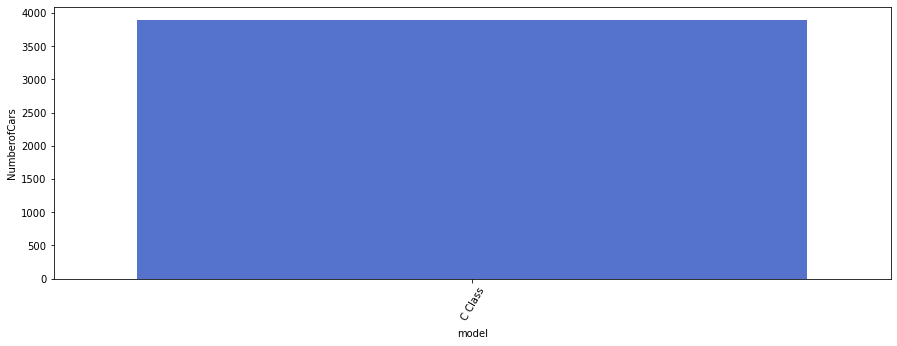

In [13]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['NumberofCars'], color='royalblue')
plt.xticks(rotation=60)

UKURAN MESIN

In [14]:
engine = df.groupby('engineSize').count()[['price']].sort_values(by='price').reset_index()
engine = engine.rename(columns={'price':'count'})

<AxesSubplot:xlabel='engineSize', ylabel='count'>

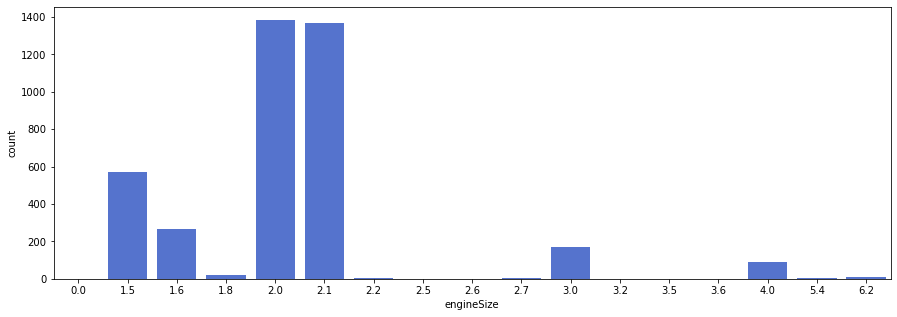

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

DISTRIBUSI MILEAGE

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

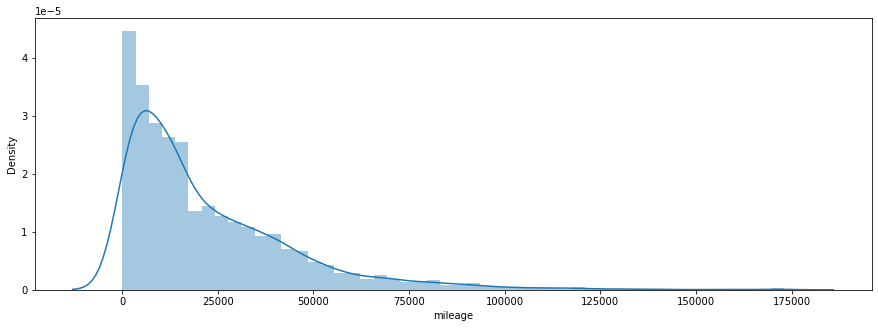

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

DISTRIBUSI HARGA MOBIL

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

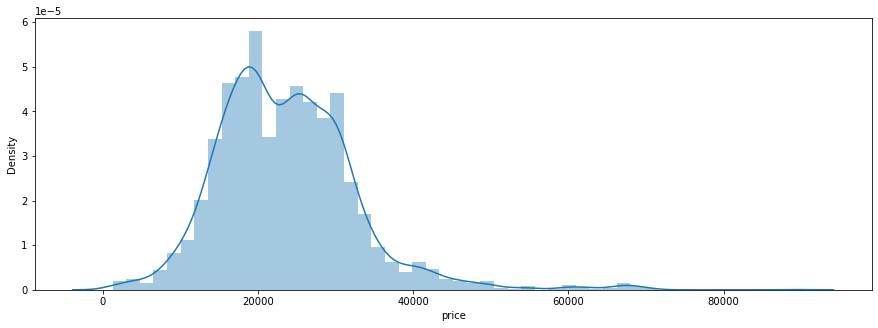

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

SELEKSI FITUR

In [28]:
features = ['year', 'mileage', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((3899, 3), (3899,))

SPLIT DATA TRAINING DAN DATA TESTING

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(975,)

MODEL REGRESI LINIER

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [31]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7829019064780074


INPUT MODEL REGRESI LINIER

In [32]:
#year=2019, mileage=5000, enginesize=2
input_data = np.array([[2019, 5000, 2]])

prediction = lr.predict(input_data)
print('Estimasi Harga: ', prediction)

Estimasi Harga:  [28839.13755461]


c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVING MODEL PICKLE

In [26]:
import pickle

filename = 'Mercedes Benz.sav'
pickle.dump(lr, open(filename, 'wb'))